# CZ3006 Lab 4 - Analyzing Network Traffic Log Data using Python

### Import the necessary libraries

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the traffic data CSV file

In [399]:
# init header
header = ["Type", "sflow_agent_address", "inputPort", "outputPort", "src_MAC", "dst_MAC", "ethernet_type", "in_vlan", "out_vlan", "src_IP", "dst_IP", "IP_protocol", "ip_tos", "ip_ttl", "src_port", "dst_port", "tcp_flags", "packet_size", "IP_size", "sampling rate","Row 21"]

# replace with the correct file
data = pd.read_csv('SFlow_Data_lab4.csv.csv', header=None, names=header, index_col=False)

# count no. of "FLOW" columns and "CNTR" columns
data["Type"].value_counts()

# first column can be "FLOW" or "CNTR"
# we want to look at entries with Type == "FLOW", thus, we extract those columns.
data = data[data.Type == 'FLOW']

### EXERCISE 4A: TOP 5 TALKERS AND LISTENERS

#### List the TOP 5 TALKERS

In [400]:
top_5_talkers = data['src_IP'].value_counts()
print("IP address\tNo. of packets")
top_5_talkers.head(n=5)

IP address	No. of packets


193.62.192.8     3041
155.69.160.32    2975
130.14.250.11    2604
14.139.196.58    2452
140.112.8.139    2056
Name: src_IP, dtype: int64

**Organisation for that IP Address**

Using https://whatismyipaddress.com or https://www.whatismyip.com/ip-whois-lookup/:

193.62.192.8 belongs to: European Bioinformatics Institute

155.69.160.32 belongs to: Nanyang Technological University

130.14.250.11 belongs to: National Library of Medicine (NLM)

14.139.196.58  belongs to: Indian Institute of Technology (IIT), Guwahati

140.112.8.139 belongs to: National Taiwan University


#### List the TOP 5 LISTENERS

In [401]:
top_5_listeners = data['dst_IP'].value_counts()
print("IP address\tNo. of packets")
top_5_listeners.head(n=5)

IP address	No. of packets


103.37.198.100     3841
137.132.228.15     3715
202.21.159.244     2446
192.101.107.153    2368
103.21.126.2       2056
Name: dst_IP, dtype: int64

**Organisation for that IP Address**

Using https://whatismyipaddress.com/ip-lookup:

103.37.198.100 belongs to: A*STAR

137.132.228.15 belongs to: National University of Singapore

202.21.159.244 belongs to: Republic Polytechnic

192.101.107.153 belongs to: Pacific Northwest National Laboratory (PNNL-Z)

103.21.126.2 belongs to: Indian Institute of Technology Bombay

### EXERCISE 4B: TRANSPORT PROTOCOL

#### PERCENTAGE OF TCP AND UDP PROTOCOL

Use this website to find which value corresponds to which transport layer protocol: https://www.iana.org/assignments/protocol-numbers/protocol-numbers.xhtml

In [402]:
ip_protocol = data['IP_protocol'].value_counts()
print("Top 5 Most Used IP Protocols")
print("IP Protocol\tNo. of packets")
ip_protocol.head(n=5)

Top 5 Most Used IP Protocols
IP Protocol	No. of packets


6     56064
17     9462
50     1698
47      657
41      104
Name: IP_protocol, dtype: int64

In [403]:
total_number_of_packets = data['IP_protocol'].count()
print("Total no. of packets: ",total_number_of_packets)
print()

row = 0 
UDP_TCP = 0
print("Header Value\tNo. of packets\t% of packets")
for i in ip_protocol:
    print(ip_protocol.index[row],'\t\t',i,'\t\t',round((i/total_number_of_packets)*100,2),'%')
    row = row + 1

Total no. of packets:  68065

Header Value	No. of packets	% of packets
6 		 56064 		 82.37 %
17 		 9462 		 13.9 %
50 		 1698 		 2.49 %
47 		 657 		 0.97 %
41 		 104 		 0.15 %
1 		 74 		 0.11 %
58 		 4 		 0.01 %
103 		 1 		 0.0 %
0 		 1 		 0.0 %


### EXERCISE 4C: TOP 5 APPLICATIONS PROTOCOL

In [404]:
top_5_applications = data['dst_port'].value_counts()
print("Dest. IP port No.\tNo. of packets")
top_5_applications.head(n=5)

Dest. IP port No.	No. of packets


443      13423
80        2647
52866     2068
45512     1356
56152     1341
Name: dst_port, dtype: int64

**Service**

443: Hypertext Transfer Protocol over TLS/SSL (HTTPS)

0: Reserved port

56152: Dynamic and/or Private Ports

43930: Private/Unassigned ports

80: Hypertext Transfer Protocol (HTTP)

### EXERCISE 4D: TOTAL TRAFFIC

In [405]:
# Calculate Total Traffic in MB
total_size_Bytes = data["IP_size"].sum()

# Assumption: Using 1 Kilobyte (KB) = 1000 bytes, not 1 Kilobyte (KB) = 1024 bytes
total_size_MegaBytes = total_size_Bytes/1000/1000

sampling_rate = 1000
time_seconds = 15*60

total_traffic = total_size_MegaBytes*sampling_rate/time_seconds
print("\nTotal Traffic in MB over 15 seconds: %.2f Mbps" % (total_traffic))


Total Traffic in MB over 15 seconds: 71.98 Mbps


### EXERCISE 4E: ADDITIONAL ANALYSIS

#### Top 5 Bidirectional Communication Pairs

In [406]:
data_new = data[(data["src_IP"] != "") & (data["dst_IP"] != "")].groupby(["src_IP", "dst_IP"]).size()
IP_pairs = {}

for i in data_new.iteritems():    
    if (i[0][0],i[0][1]) in IP_pairs:
        IP_pairs[i[0][0],i[0][1]] += i[1]
    elif (i[0][1],i[0][0]) in IP_pairs:
        IP_pairs[i[0][1],i[0][0]] += i[1]
    else:
        IP_pairs[i[0][0],i[0][1]] = i[1]
        
data_sorted = sorted(IP_pairs.items(), key=lambda k: k[1], reverse = True)[0:5]

data_4E=pd.DataFrame(data_sorted)
data_4E.columns = ["(IP Address 1, IP Address 2)","No. Of Packets"]
data_4E

,"(IP Address 1, IP Address 2)",No. Of Packets
0,"(137.132.228.15, 193.62.192.8)",4951
1,"(103.37.198.100, 130.14.250.11)",2842
2,"(14.139.196.58, 192.101.107.153)",2368
3,"(140.112.8.139, 103.21.126.2)",2056
4,"(140.90.101.61, 167.205.52.8)",1752


#### Barchart Visualization of Top 5 Bidirectional Communication Pairs

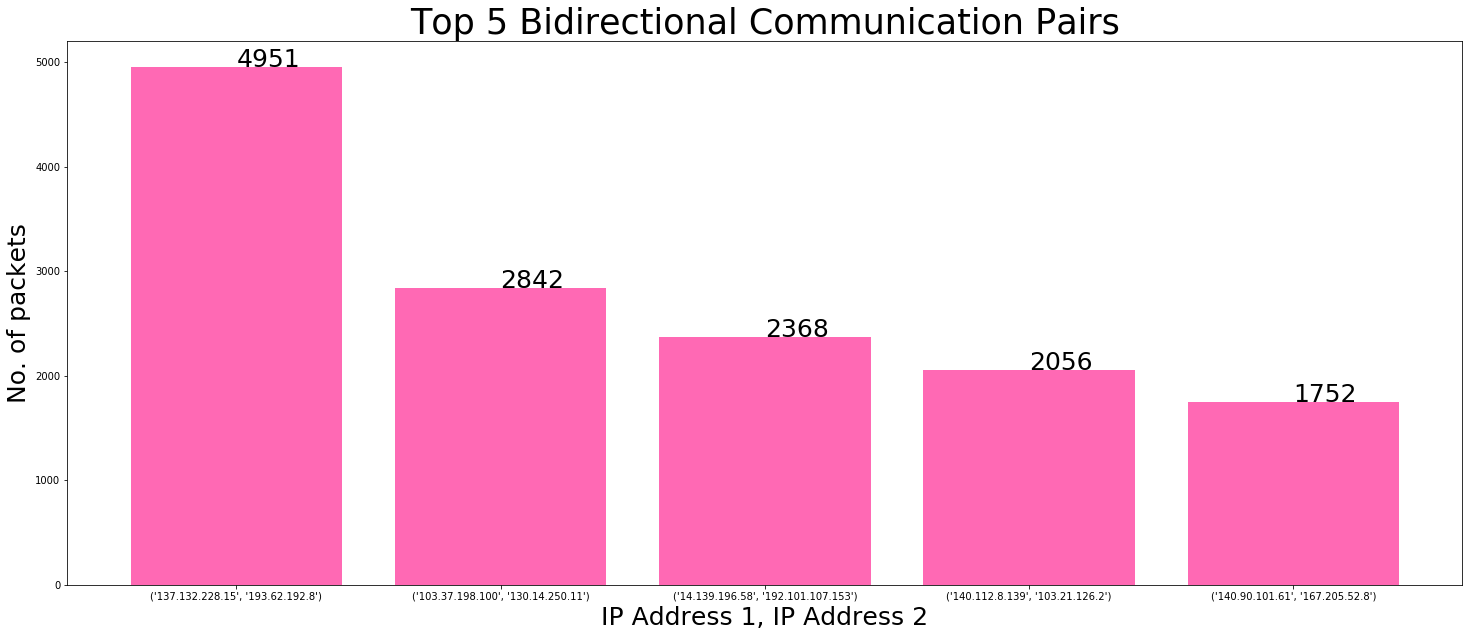

In [407]:
fig, axes = plt.subplots(figsize=(25, 10))
row = [i for i in data_4E.index] 

plt.xlabel("IP Address 1, IP Address 2", fontsize = 25)
plt.ylabel("No. of packets", fontsize = 25)
plt.title("Top 5 Bidirectional Communication Pairs", fontsize = 35)

plt.bar(row, data_4E["No. Of Packets"], align = "center", color="hotpink")

for i, v in enumerate(data_4E["No. Of Packets"]):
    axes.text(i, v, str(v), fontsize = 25)

labels = ["",data_4E.loc[0][0],data_4E.loc[1][0],data_4E.loc[2][0],data_4E.loc[3][0],data_4E.loc[4][0]]
axes.set_xticklabels(labels)

plt.show()

### Findings

Using  https://whatismyipaddress.com or 
https://whatismyipaddress.com/ip-lookup


The top 1st communication pair (193.62.192.8, 137.132.228.15) is between European Bioinformatics Institute and National University of Singapore, and has sent a total of 4951 packets to each other.

The top 2nd communication pair (130.14.250.11, 103.37.198.100) is between National Library of Medicine (NLM) and A*STAR, and has sent a total of 2842 packets to each other.

The top 3rd communication pair (14.139.196.58, 192.101.107.153) is between Indian Institute of Technology (IIT), Guwahati and Pacific Northwest National Laboratory (PNNL-Z), and has sent a total of 2368 to each other.

The top 4th communication pair (140.112.8.139, 103.21.126.2) is between National Taiwan University and Indian Institute of Technology Bombay, and has sent a total of 2056 packets to each other.

The top 5th communication pair (137.132.228.15, 193.62.192.8) is between National University of Singapore and European Bioinformatics Institute, and has sent a total of 1752 packets to each other.
